In [2]:
from astropy.io import fits
import pandas as pd

# Read fits files
file_path = 'final_matched_highz_catalogue.fits'  # the fits table from the outcome of the scripts
with fits.open(file_path) as hdul:
    data = hdul[1].data  # 
    df = pd.DataFrame(data)  # to Pandas DataFrame

# check the columns and first few rows
print(df.columns)
print(df.head())

Index(['sdss_name', 'sdss_ra', 'sdss_dec', 'sdss_z', 'sdss_source_z',
       'FIRST_r1', 'source_tier_first', 'Fpeak_r1', 'Fint_r1', 'Rms_r1',
       'NVSS_r2', 'source_tier_nvss', 'S1.4_r2', 'e_S1.4_r2', 'GLEAM_r3',
       'source_tier_gleam', 'Fpwide_r3', 'e_Fpwide_r3', 'Fintwide_r3',
       'e_Fintwide_r3', 'RACS-DR1_r4', 'source_tier_racs', 'Fpk_r4',
       'e_Fpk_r4', 'Ftot_r4', 'e_Ftot_r4'],
      dtype='object')
            sdss_name   sdss_ra  sdss_dec    sdss_z sdss_source_z  \
0  000017.32-044502.3  0.072189 -4.750661  3.274816          PIPE   
1  000023.29+014501.8  0.097058  1.750519  3.097035          PIPE   
2  000051.56+001202.5  0.214857  0.200716  3.865000            VI   
3  000154.27+094414.9  0.476156  9.737474  4.858996          PIPE   
4  000215.84+021744.6  0.566032  2.295731  3.110528          PIPE   

           FIRST_r1  source_tier_first  Fpeak_r1  Fint_r1  Rms_r1  ...  \
0  J000017.3-044501                  1      1.69     1.23   0.152  ...   
1  J000023.2+0

In [ ]:
# generate the csv table and renaming the columns for convenience
columns = [
    "FIRST_r1", "NVSS_r2", "GLEAM_r3", "RACS-DR1_r4",
    "Fpeak_r1", "Fint_r1", "Rms_r1", "S1.4_r2", "e_S1.4_r2",
    "Fpwide_r3", "e_Fpwide_r3", "Fintwide_r3", "e_Fintwide_r3",
    "Fpk_r4", "e_Fpk_r4", "Ftot_r4", "e_Ftot_r4"
]

new_columns = [
    "FIRST", "NVSS", "GLEAM", "RACS-DR1",
    "Fpeak_first", "Fint_first", "Rms_first", "S1.4_nvss", "e_S1.4_nvss",
    "Fpwide_gleam", "e_Fpwide_gleam", "Fintwide_gleam", "e_Fintwide_gleam",
    "Fpk_racs", "e_Fpk_racs", "Ftot_racs", "e_Ftot_racs"
]
df.rename(columns={old: new for old, new in zip(columns, new_columns)}, inplace=True)
print(df.head())

            sdss_name   sdss_ra  sdss_dec    sdss_z sdss_source_z  \
0  000017.32-044502.3  0.072189 -4.750661  3.274816          PIPE   
1  000023.29+014501.8  0.097058  1.750519  3.097035          PIPE   
2  000051.56+001202.5  0.214857  0.200716  3.865000            VI   
3  000154.27+094414.9  0.476156  9.737474  4.858996          PIPE   
4  000215.84+021744.6  0.566032  2.295731  3.110528          PIPE   

              FIRST  source_tier_first  Fpeak_first  Fint_first  Rms_first  \
0  J000017.3-044501                  1         1.69        1.23      0.152   
1  J000023.2+014501                  1         2.36        2.02      0.084   
2  J000051.5+001202                  1         2.74        2.64      0.103   
3  J000154.2+094414                  1         6.83        6.85      0.120   
4  J000215.8+021744                  1         3.06        3.08      0.137   

   ... Fpwide_gleam  e_Fpwide_gleam  Fintwide_gleam  e_Fintwide_gleam  \
0  ...          NaN             NaN        

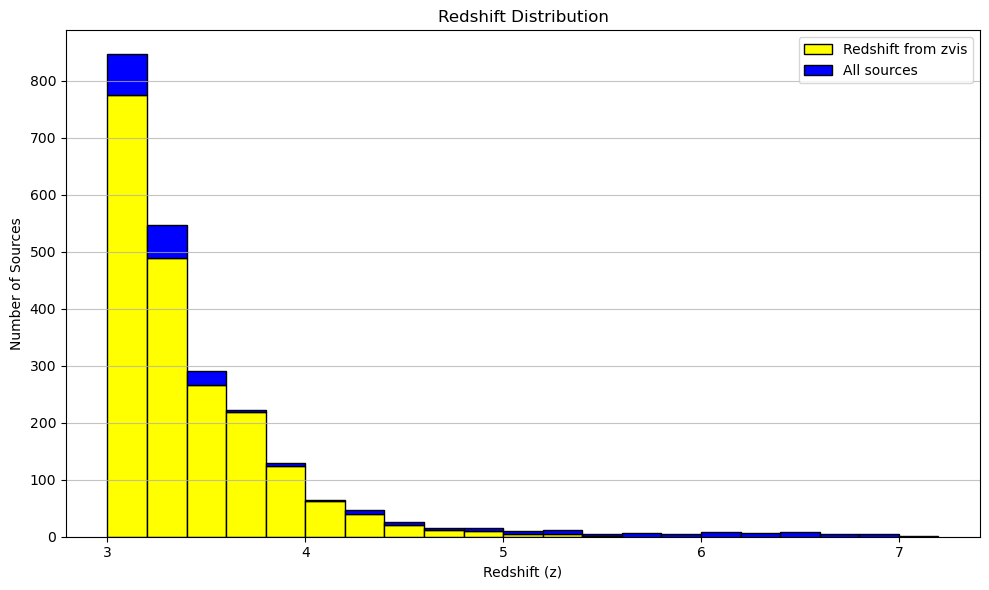

In [49]:
from matplotlib import pyplot as plt

#draw the hitogram figure for redshift distribution
plt.figure(figsize=(10, 6))
# start from z= 3 and ends at z= 7.2, bin width is 0.2
z_vis_only = df[df['sdss_source_z'] != 'PIPE']['sdss_z']
z_all = df['sdss_z']
z_rest = df[df['sdss_source_z'] == 'PIPE']['sdss_z']
plt.hist([z_vis_only, z_rest], bins=21, range=(3, 7.2),
         stacked=True,
         edgecolor='black',
         color=['yellow', 'blue'],
         label=['Redshift from zvis', 'All sources'])
# plt.hist(df['sdss_z'], bins=21, range=(3, 7.2), color='blue', edgecolor='black')
# # add another histogram for only sdss_source_z != PIPE
# plt.hist(df[df['sdss_source_z'] != 'PIPE']['sdss_z'], bins=21, range=(3, 7.2), color='yellow', alpha=0.5, edgecolor='white')
plt.legend(loc='upper right')
plt.title('Redshift Distribution')
plt.xlabel('Redshift (z)')
plt.ylabel('Number of Sources')
plt.grid(axis='y', alpha=0.75)
# using log scale for y-axis
# plt.yscale('log')
plt.tight_layout()
plt.savefig('redshift_distribution.pdf', format='pdf',  dpi=300)
plt.show()

In [50]:
# show the numbers of every redshift range
# z>3 is 1515
# check z>4 
print("Number of sources with z >= 3:", len(df[df['sdss_z'] >= 3]))
# check z>4
print("Number of sources with z >= 4:", len(df[df['sdss_z'] >= 4]))
# check z>5
print("Number of sources with z >= 5:", len(df[df['sdss_z'] >= 5]))
# check z>6
print("Number of sources with z >= 6:", len(df[df['sdss_z'] >= 6]))
# check z>7
print("Number of sources with z >= 7:", len(df[df['sdss_z'] >= 7]))
# for a statistical check, just look for source_tier_first =1 source with each redshift range
print("Number of sources with z >= 3 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 3) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 3 and source_tier_first = 1
print("Number of sources with z >= 4 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 4) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 5 and source_tier_first = 1
print("Number of sources with z >= 5 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 5) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 6 and source_tier_first = 1
print("Number of sources with z >= 6 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 6) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 7 and source_tier_first = 1
print("Number of sources with z >= 7 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 7) & (df['source_tier_first'] == 1)]))

# COunt source numbers that has sdss_source_z != PIPE & source_z > 5
print("Number of sources with sdss_source_z != PIPE and z >= 5:", len(df[(df['sdss_source_z'] != 'PIPE') & (df['sdss_z'] >= 5)]))





Number of sources with z >= 3: 2270
Number of sources with z >= 4: 235
Number of sources with z >= 5: 69
Number of sources with z >= 6: 32
Number of sources with z >= 7: 1
Number of sources with z >= 3 and source_tier_first = 1: 1518
Number of sources with z >= 4 and source_tier_first = 1: 180
Number of sources with z >= 5 and source_tier_first = 1: 52
Number of sources with z >= 6 and source_tier_first = 1: 25
Number of sources with z >= 7 and source_tier_first = 1: 1
Number of sources with sdss_source_z != PIPE and z >= 5: 10


In [3]:
# 读取 FITS 文件
import numpy as np
from astropy.table import Table

file_path = 'tmp_sdssz3.fits' 
with fits.open(file_path) as hdul:
    data = hdul[1].data
    # 创建新的字段字典，每列单独判断处理
    fixed_columns = {}
    for name in data.names:
        col = data[name]
        # 如果是数字列，就转换为本地字节序（避免 big-endian 报错）
        if np.issubdtype(col.dtype, np.number):
            fixed_columns[name] = col.byteswap().newbyteorder()
        else:
            fixed_columns[name] = col  # 字符串或 bool 列保留

    # 转换为 DataFrame
    df2 = pd.DataFrame(fixed_columns)
# 查看列名和前几行
print(df2.columns)
print(df2.head())
source_z = df2['Z']
source_z

Index(['SDSS_NAME', 'RA', 'DEC', 'IS_QSO_QN', 'Z_QN', 'Z', 'SOURCE_Z',
       'Z_PIPE', 'Z_VI', 'Z_CONF', 'GALEX_MATCHED', 'UKIDSS_MATCHED',
       'FIRST_MATCHED', 'SDSS2FIRST_SEP', 'SDSS2MASS_SEP', '2RXS_ID',
       'SDSS2ROSAT_SEP', 'XMM_SRC_ID', 'SDSS2XMM_SEP', 'GAIA_MATCHED'],
      dtype='object')
            SDSS_NAME        RA        DEC  IS_QSO_QN      Z_QN      Z  \
0  000001.41+200044.1  0.005912  20.012258          1  3.082407  3.090   
1  000001.81+141150.5  0.007579  14.197385          1  3.713385  3.711   
2  000005.19+134227.5  0.021651  13.707654          1  3.005653  3.009   
3  000005.88+340252.3  0.024507  34.047872          1  3.116898  3.124   
4  000006.38-065404.9  0.026617  -6.901368          1  3.247015  3.250   

  SOURCE_Z    Z_PIPE   Z_VI  Z_CONF  GALEX_MATCHED  UKIDSS_MATCHED  \
0       VI  3.087898  3.090       3              1               0   
1       VI  3.712188  3.711       3              1               1   
2       VI  3.008373  3.009       3     

0        3.090000
1        3.711000
2        3.009000
3        3.124000
4        3.250000
           ...   
39546    3.126000
39547    3.167000
39548    3.066000
39549    3.309383
39550    3.109000
Name: Z, Length: 39551, dtype: float64

In [ ]:
# check z>3
print("Number of sources with z >= 3:", len(df2[source_z >= 3.0]))
print("Number of sources with 3 <= z < 4:", len(df2[(source_z >= 3) & (source_z < 4)]))
# check z>4
print("Number of sources with z >= 4:", len(df2[source_z >= 4.0]))
print("Number of sources with 4 <= z < 5:", len(df2[(source_z >= 4) & (source_z < 5)]))
# check z>5
print("Number of sources with z >= 5:", len(df2[source_z >= 5]))


Number of sources with z >= 3: 39551
Number of sources with 3 <= z < 4: 36545
Number of sources with z >= 4: 3006
Number of sources with 4 <= z < 5: 2349
Number of sources with z >= 5: 657


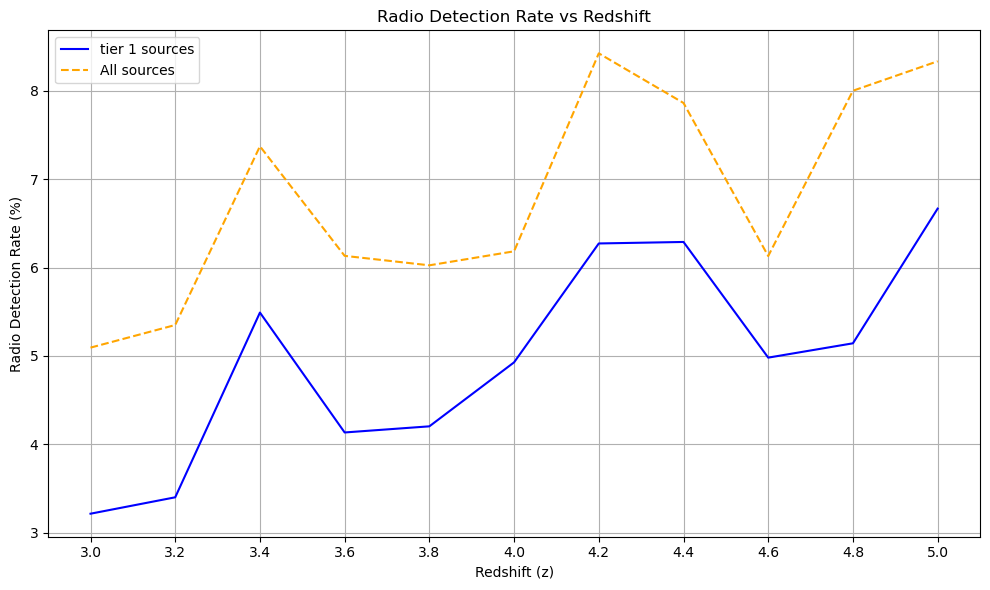

In [16]:
# make a plot for radio detection rate along different redshift bins
import matplotlib.pyplot as plt
import numpy as np
# Define redshift bins and their edges
data_bin_width = 0.2
redshift_bins = np.arange(3, 5.2, data_bin_width)
# Define the number of sources in each bin
radio_detection_rate = []
radio_detection_rate2 = []
for z in redshift_bins:
    # Count sources with z in the current bin and source_tier_first = 1
    radio_count = len(df[(df['sdss_z'] >= z) & (df['source_tier_first'] == 1) & (df['sdss_z'] < z + data_bin_width)])
    radio_count2 = len(df[(df['sdss_z'] >= z) & (df['sdss_z'] < z + data_bin_width)])
    optical_count = len(df2[(source_z >= z) & (source_z < z + data_bin_width)])
    radio_rate = radio_count / optical_count if optical_count > 0 else 0
    count = radio_rate * 100  # Convert to percentage
    count2 = radio_count2 / optical_count * 100 if optical_count > 0 else 0
    radio_detection_rate.append(count)
    radio_detection_rate2.append(count2)
# Plotting the radio detection rate
plt.figure(figsize=(10, 6))
plt.plot(redshift_bins, radio_detection_rate, linestyle='-', color='blue', label='tier 1 sources')
plt.plot(redshift_bins, radio_detection_rate2, linestyle='--', color='orange', label='All sources')
plt.title('Radio Detection Rate vs Redshift')
plt.xlabel('Redshift (z)')
plt.ylabel('Radio Detection Rate (%)')
plt.xticks(np.arange(3, 5.2, 0.2))
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('radio_detection_rate_vs_redshift.pdf', format='pdf', dpi=300)
plt.show()

In [68]:
file_path = 'matched_o1r1234_total.fits' 
with fits.open(file_path) as hdul:
    data = hdul[1].data
    # 创建新的字段字典，每列单独判断处理
    fixed_columns = {}
    for name in data.names:
        col = data[name]
        # 如果是数字列，就转换为本地字节序（避免 big-endian 报错）
        if np.issubdtype(col.dtype, np.number):
            fixed_columns[name] = col.byteswap().newbyteorder()
        else:
            fixed_columns[name] = col  # 字符串或 bool 列保留

    # 转换为 DataFrame
    df2 = pd.DataFrame(fixed_columns)
# 查看列名和前几行
print(df2.columns)

Index(['sdss_name', 'sdss_ra', 'sdss_dec', 'sdss_z', 'sdss_source_z',
       'sdss_zvi', 'sdss_zpipe', 'sdss_zconf', 'IS_QSO_QN_o1_first',
       'Z_QN_o1_first',
       ...
       'e_amaj_r4', 'e_bmin_r4', 'PA_r4', 'e_PA_r4', 'Separation_racs',
       'GrpSize_before_racs', 'group_z_min_racs', 'GroupID_racs',
       'GroupSize_racs', 'source_tier_racs'],
      dtype='object', length=130)
